**Load the required libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams
from IPython.display import display
pd.options.display.max_columns = None
import seaborn as sns

In [2]:
# Install plotly if not already installed
!pip install plotly

# Import necessary libraries
import plotly.express as px

**Read the data**

**Mounting Google Drive locally**

In [3]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


**Changing your current directory**

In [ ]:
import os
root_dir = 'replace with Your dir'
%cd $root_dir

/content/drive/MyDrive/AdvancedTopic/Project2_1


**Read the dataset**

In [5]:
defendantData = pd.read_csv("DefendantDataSet.csv")

In [ ]:
print(defendantData.columns)

Index(['id', 'name', 'first', 'last', 'compas_screening_date', 'sex', 'dob',
       'age', 'age_cat', 'race', 'juv_fel_count', 'decile_score',
       'juv_misd_count', 'juv_other_count', 'priors_count',
       'days_b_screening_arrest', 'c_jail_in', 'c_jail_out', 'c_case_number',
       'c_offense_date', 'c_arrest_date', 'c_days_from_compas',
       'c_charge_degree', 'c_charge_desc', 'is_recid', 'r_case_number',
       'r_charge_degree', 'r_days_from_arrest', 'r_offense_date',
       'r_charge_desc', 'r_jail_in', 'r_jail_out', 'violent_recid',
       'is_violent_recid', 'vr_case_number', 'vr_charge_degree',
       'vr_offense_date', 'vr_charge_desc', 'type_of_assessment',
       'decile_score.1', 'score_text', 'screening_date',
       'v_type_of_assessment', 'v_decile_score', 'v_score_text',
       'v_screening_date', 'in_custody', 'out_custody', 'priors_count.1',
       'start', 'end', 'event', 'two_year_recid'],
      dtype='object')


In [ ]:
print(defendantData.dtypes)

id                           int64
name                        object
first                       object
last                        object
compas_screening_date       object
sex                         object
dob                         object
age                          int64
age_cat                     object
race                        object
juv_fel_count                int64
decile_score                 int64
juv_misd_count               int64
juv_other_count              int64
priors_count                 int64
days_b_screening_arrest    float64
c_jail_in                   object
c_jail_out                  object
c_case_number               object
c_offense_date              object
c_arrest_date               object
c_days_from_compas         float64
c_charge_degree             object
c_charge_desc               object
is_recid                     int64
r_case_number               object
r_charge_degree             object
r_days_from_arrest         float64
r_offense_date      

In [ ]:
defendantData.head()

,id,name,first,last,compas_screening_date,sex,dob,age,age_cat,race,juv_fel_count,decile_score,juv_misd_count,juv_other_count,priors_count,days_b_screening_arrest,c_jail_in,c_jail_out,c_case_number,c_offense_date,c_arrest_date,c_days_from_compas,c_charge_degree,c_charge_desc,is_recid,r_case_number,r_charge_degree,r_days_from_arrest,r_offense_date,r_charge_desc,r_jail_in,r_jail_out,violent_recid,is_violent_recid,vr_case_number,vr_charge_degree,vr_offense_date,vr_charge_desc,type_of_assessment,decile_score.1,score_text,screening_date,v_type_of_assessment,v_decile_score,v_score_text,v_screening_date,in_custody,out_custody,priors_count.1,start,end,event,two_year_recid
0,1,miguel hernandez,miguel,hernandez,2013-08-14,Male,1947-04-18,69,Greater than 45,Other,0,1,0,0,0,-1.0,2013-08-13 06:03:42,2013-08-14 05:41:20,13011352CF10A,2013-08-13,NaN,1.0,F,Aggravated Assault w/Firearm,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,Risk of Recidivism,1,Low,2013-08-14,Risk of Violence,1,Low,2013-08-14,2014-07-07,2014-07-14,0,0,327,0,0
1,3,kevon dixon,kevon,dixon,2013-01-27,Male,1982-01-22,34,25 - 45,African-American,0,3,0,0,0,-1.0,2013-01-26 03:45:27,2013-02-05 05:36:53,13001275CF10A,2013-01-26,NaN,1.0,F,Felony Battery w/Prior Convict,1,13009779CF10A,(F3),NaN,2013-07-05,Felony Battery (Dom Strang),NaN,NaN,NaN,1,13009779CF10A,(F3),2013-07-05,Felony Battery (Dom Strang),Risk of Recidivism,3,Low,2013-01-27,Risk of Violence,1,Low,2013-01-27,2013-01-26,2013-02-05,0,9,159,1,1
2,4,ed philo,ed,philo,2013-04-14,Male,1991-05-14,24,Less than 25,African-American,0,4,0,1,4,-1.0,2013-04-13 04:58:34,2013-04-14 07:02:04,13005330CF10A,2013-04-13,NaN,1.0,F,Possession of Cocaine,1,13011511MM10A,(M1),0.0,2013-06-16,Driving Under The Influence,2013-06-16,2013-06-16,NaN,0,NaN,NaN,NaN,NaN,Risk of Recidivism,4,Low,2013-04-14,Risk of Violence,3,Low,2013-04-14,2013-06-16,2013-06-16,4,0,63,0,1
3,5,marcu brown,marcu,brown,2013-01-13,Male,1993-01-21,23,Less than 25,African-American,0,8,1,0,1,NaN,NaN,NaN,13000570CF10A,2013-01-12,NaN,1.0,F,Possession of Cannabis,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,Risk of Recidivism,8,High,2013-01-13,Risk of Violence,6,Medium,2013-01-13,NaN,NaN,1,0,1174,0,0
4,6,bouthy pierrelouis,bouthy,pierrelouis,2013-03-26,Male,1973-01-22,43,25 - 45,Other,0,1,0,0,2,NaN,NaN,NaN,12014130CF10A,NaN,2013-01-09,76.0,F,arrest case no charge,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,Risk of Recidivism,1,Low,2013-03-26,Risk of Violence,1,Low,2013-03-26,NaN,NaN,2,0,1102,0,0


**Adjust plot size**

In [ ]:
%matplotlib inline
rcParams['figure.figsize'] = [15, 5]

**Data Exploration**


**Distribution by age.**

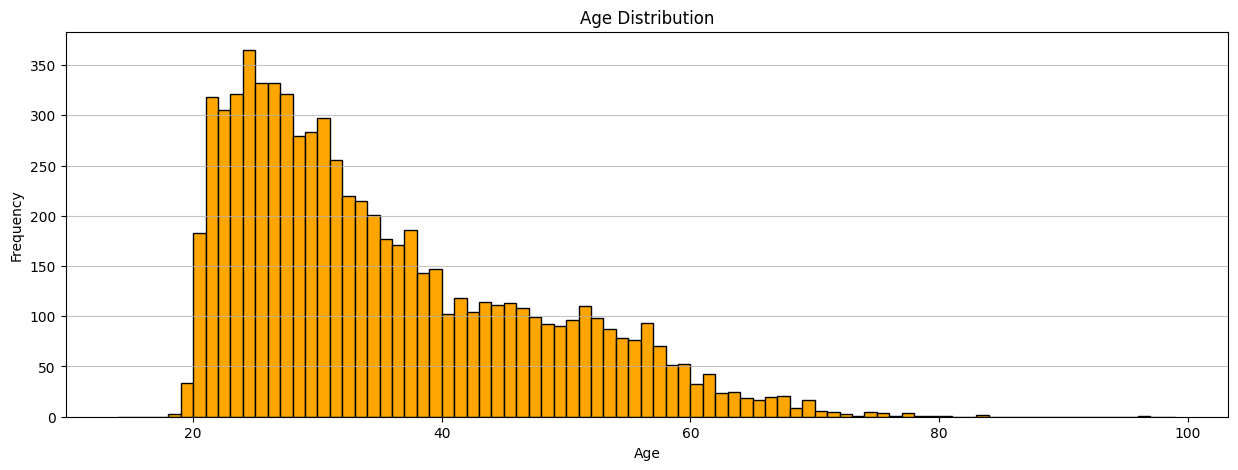

In [ ]:
plt.hist(defendantData['age'], bins=range(14, 100),edgecolor = 'black', color = 'orange')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)
plt.show()


Text(0.5, 1.0, 'Age Distribution')

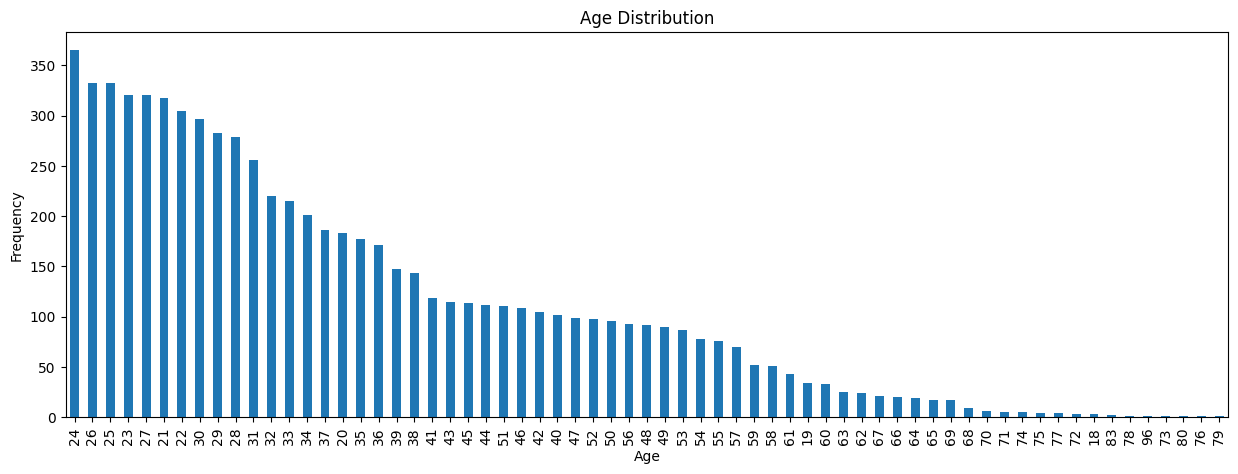

In [ ]:
defendantData['age'].value_counts().plot(kind = 'bar')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Age Distribution')

The distribution of age is skewed to the right. we observe more number of records for age less than 40 compare to greater than 40.

**Distribution by race.**

Text(0.5, 1.0, 'Race Distribution')

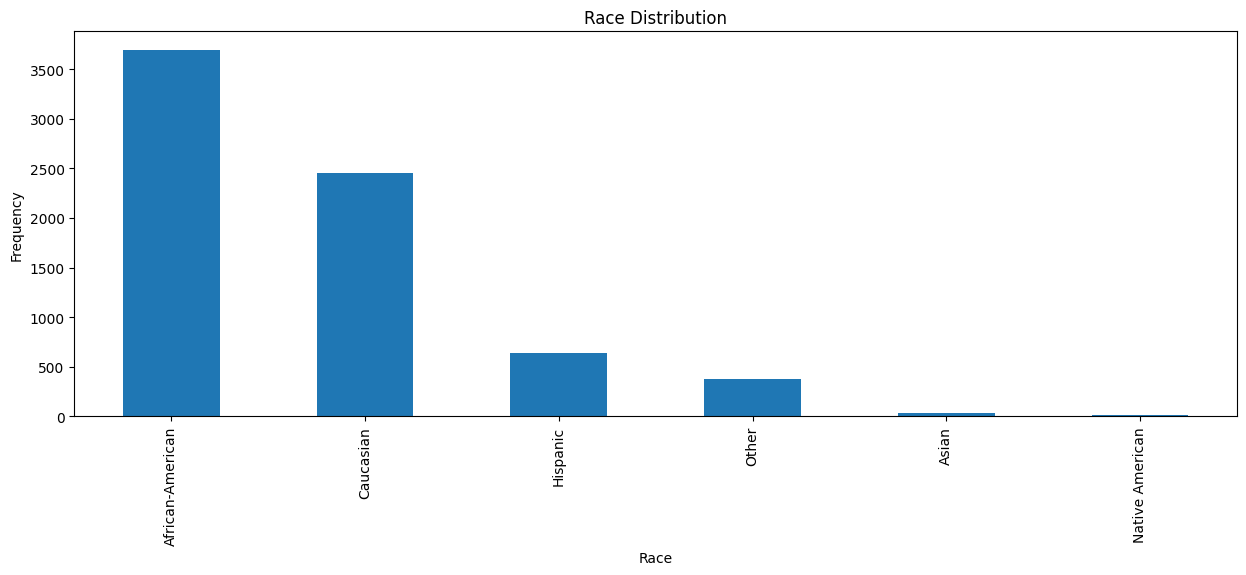

In [ ]:
defendantData['race'].value_counts().plot(kind = 'bar')
plt.xlabel('Race')
plt.ylabel('Frequency')
plt.title('Race Distribution')

In [6]:
defendantData['race'].value_counts()

African-American    3696
Caucasian           2454
Hispanic             637
Other                377
Asian                 32
Native American       18
Name: race, dtype: int64

As the bar plot shoews african-american and caucasian have the most proportion of records in the dataset compare to the Hispanic, other, Asian, and Native American.
Native American and Asian have the fewest number of observation in the dataset.

**Distribution by sex.**

Text(0.5, 1.0, 'Sex Distribution')

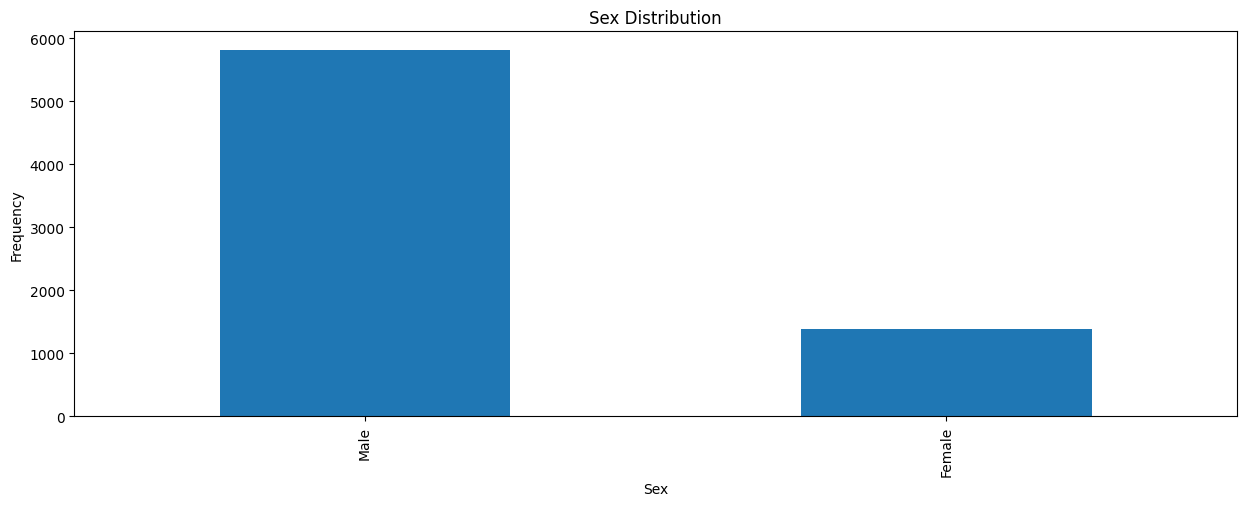

In [ ]:
defendantData['sex'].value_counts().plot(kind='bar')
plt.xlabel('Sex')
plt.ylabel('Frequency')
plt.title('Sex Distribution')

In [7]:
defendantData['sex'].value_counts()

Male      5819
Female    1395
Name: sex, dtype: int64

Male has the highest number of observation which is 5819.
Female records are 1395.

**The system scores on a range of 1-10, and who will be jailed and not be jailed (7 or higher means high risk and therefore will be jailed).**

In [ ]:
defendantData['decile_score'].value_counts()

1     1440
2      941
4      769
3      747
5      681
6      641
7      592
8      512
9      508
10     383
Name: decile_score, dtype: int64

In [9]:
defendantData['jail_pred'] = defendantData['decile_score'].map(lambda x: 'Not be jailed' if x < 7 else 'Will be jailed')

Text(0.5, 1.0, 'Jail Prediction Status')

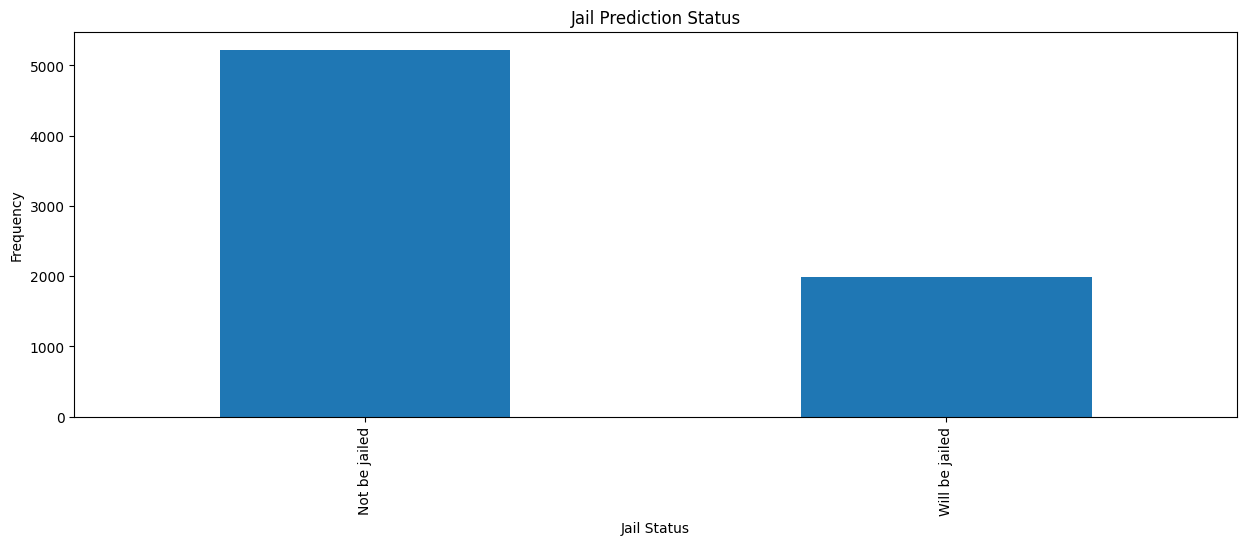

In [ ]:
defendantData['jail_pred'].value_counts().plot(kind='bar')

plt.xlabel('Jail Status')
plt.ylabel('Frequency')
plt.title('Jail Prediction Status')


In [10]:
defendantData['jail_pred'].value_counts()

Not be jailed     5219
Will be jailed    1995
Name: jail_pred, dtype: int64

The above plot, jail status, shows that most of people, 5219, in the dataset should not be jailed based on their score. on the other hand 1995 people should be jailed based on the high risk score.

**Given their scores, visualise individuals who were actually arrested and those who were not arrested; compute the accuracy of the prediction based on the risk scores.**


**Individuals who were actually arrested and those who were not arrested**


In [ ]:
defendantData['c_jail_in'].isna().sum()

307

Important: I assume that the null values shows people who are not arrested.

In [14]:
defendantData['arresting_status'] = np.where(defendantData['c_jail_in'].isna(), 'Not arrested', 'Arrested')

Text(0.5, 1.0, 'Arrasting Status')

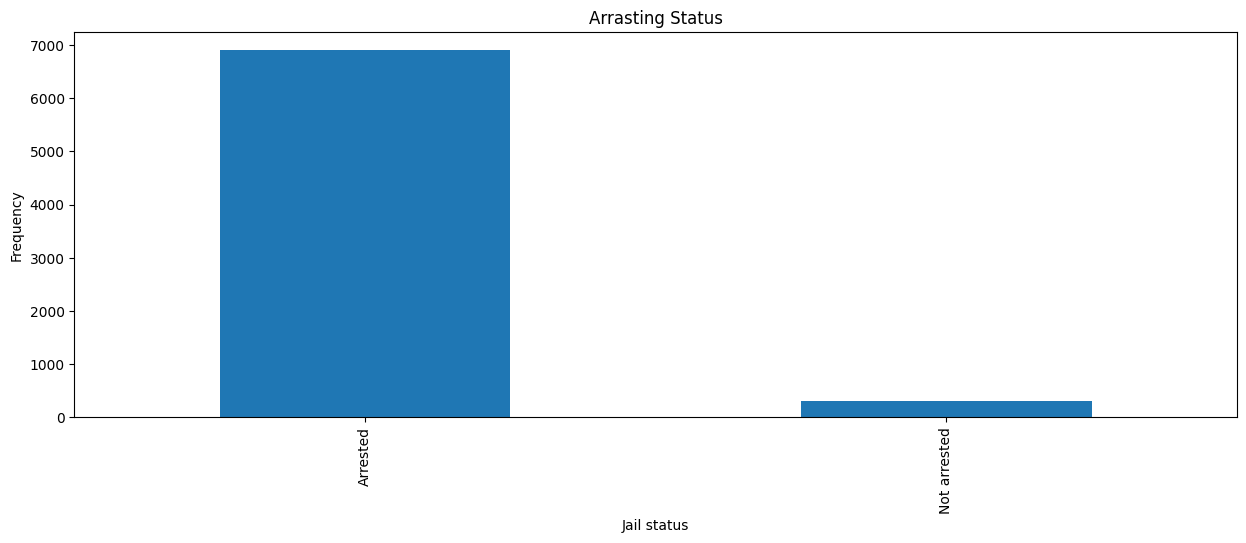

In [ ]:
defendantData['arresting_status'].value_counts().plot(kind='bar')

plt.xlabel('Jail status')
plt.ylabel('Frequency')
plt.title('Arrasting Status')

In [ ]:
defendantData['arresting_status'].value_counts()

Arrested        6907
Not arrested     307
Name: arresting_status, dtype: int64

Actual situation is, 6907 are jailed and 307 are not jailed. we obser that the prediction and real world situation are very different.

**compute the accuracy of the prediction based on the risk scores.**



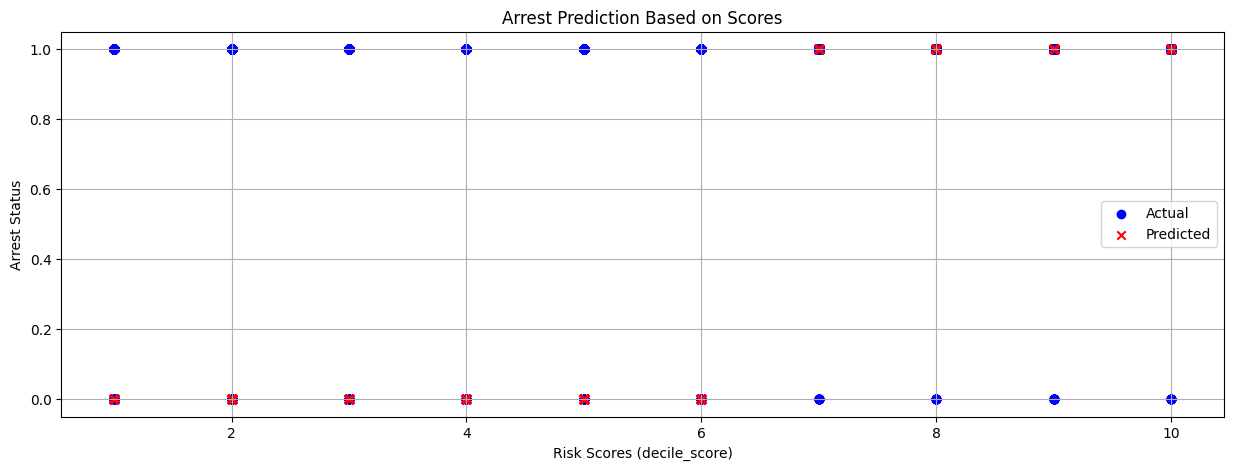

In [ ]:
# Visualize individuals based on their scores and actual arrest status
plt.scatter(defendantData['decile_score'], defendantData['arresting_status'].map({'Not arrested': 0, 'Arrested': 1}), color='blue', label='Actual')
plt.scatter(defendantData['decile_score'], defendantData['jail_pred'].map({'Not be jailed': 0, 'Will be jailed': 1}), color='red', marker='x', label='Predicted')

# Customize the plot
plt.title('Arrest Prediction Based on Scores')
plt.xlabel('Risk Scores (decile_score)')
plt.ylabel('Arrest Status')
plt.legend()
plt.grid(True)

# Show the plot
plt.show()




In [ ]:
from sklearn.metrics import accuracy_score


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

In [ ]:
# Compute accuracy
accuracy = accuracy_score(defendantData['arresting_status'].map({'Not arrested': 0, 'Arrested': 1}), defendantData['jail_pred'].map({'Not be jailed': 0, 'Will be jailed': 1}))
print(f'Accuracy: {accuracy:.2%}')

Accuracy: 29.50%


In [ ]:
defendantData['jail_pred'].value_counts()

Not be jailed     5219
Will be jailed    1995
Name: jail_pred, dtype: int64

The accuarcy of 29.50% is very low and this suggests the model is not very accurate model. the model can not predict the labels very well.

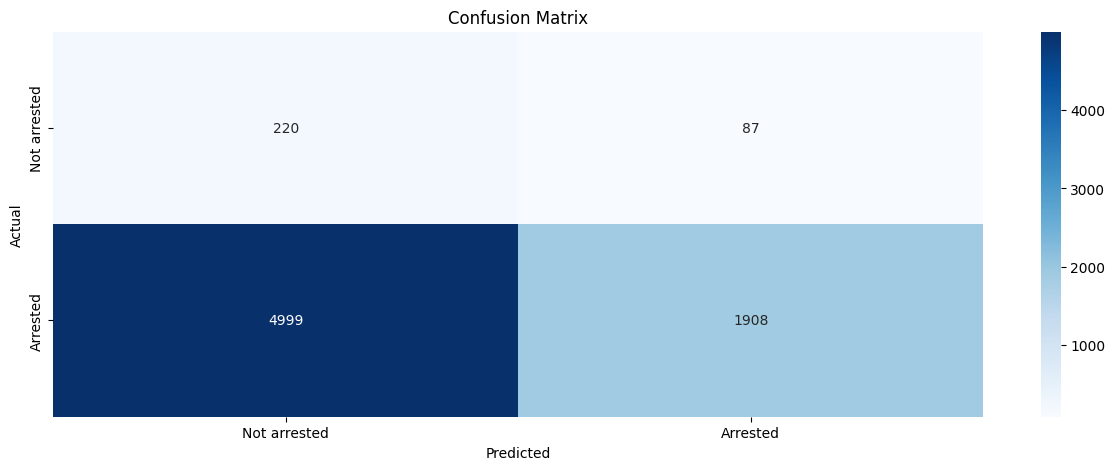

In [ ]:
from sklearn.metrics import confusion_matrix

actualLabels = defendantData['arresting_status'].map({'Not arrested': 0, 'Arrested': 1})
predictedLabels = defendantData['jail_pred'].map({'Not be jailed': 0, 'Will be jailed': 1})

# Compute confusion matrix
confMatrix = confusion_matrix(actualLabels, predictedLabels)

# Plot the confusion matrix as a heatmap
sns.heatmap(confMatrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Not arrested', 'Arrested'], yticklabels=['Not arrested', 'Arrested'])

# Customize the plot
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')

# Show the plot
plt.show()


The confusion matrix shows that the model predicts 4999 should not be jailed but these people are jailed in the actual situation. also the model says 87 should be jailed but they are not arrested in the actual situation. The model predict 1908 should be rreste and 220 should bot be arrested correctlly.

**Create another visualisation like (1) except the high risk is now moved to 6 (i.e., 6 or higher means high risk)**

In [11]:
defendantData['jail_pred_1'] = defendantData['decile_score'].map(lambda x: 'Not be jailed' if x < 6 else 'Will be jailed')

Text(0.5, 1.0, 'Jail Prediction Status (>6)')

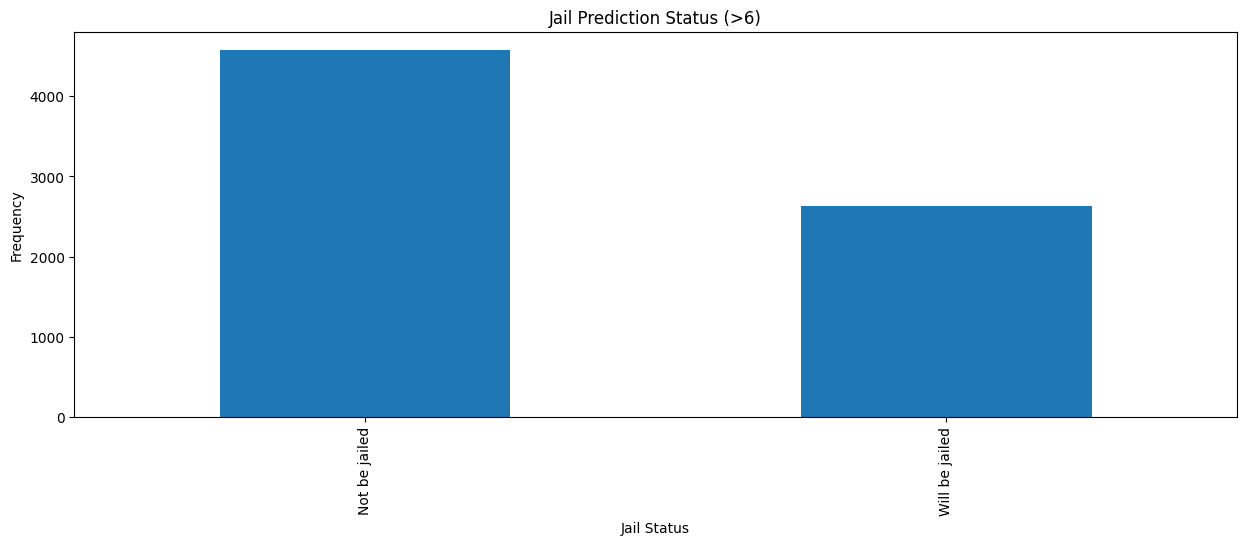

In [ ]:
defendantData['jail_pred_1'].value_counts().plot(kind='bar')

plt.xlabel('Jail Status')
plt.ylabel('Frequency')
plt.title('Jail Prediction Status (>6)')

In [12]:
defendantData['jail_pred_1'].value_counts()

Not be jailed     4578
Will be jailed    2636
Name: jail_pred_1, dtype: int64

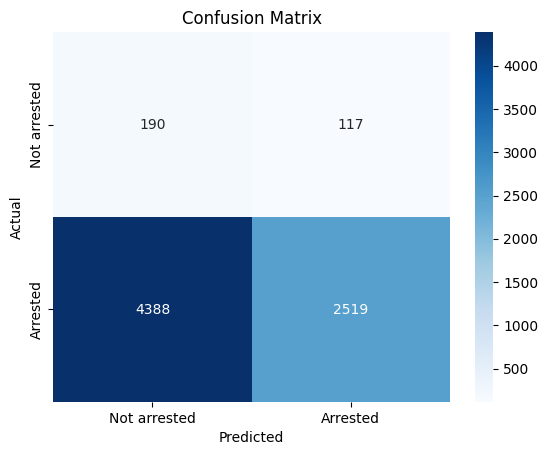

In [15]:
from sklearn.metrics import confusion_matrix

actualLabels = defendantData['arresting_status'].map({'Not arrested': 0, 'Arrested': 1})
predictedLabels = defendantData['jail_pred_1'].map({'Not be jailed': 0, 'Will be jailed': 1})

# Compute confusion matrix
confMatrix = confusion_matrix(actualLabels, predictedLabels)

# Plot the confusion matrix as a heatmap
sns.heatmap(confMatrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Not arrested', 'Arrested'], yticklabels=['Not arrested', 'Arrested'])

# Customize the plot
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')

# Show the plot
plt.show()

The confusion matrix shows that the model predicts 4388 should not be jailed but these people are jailed in the actual situation. also the model says 117 should be jailed but they are not arrested in the actual situation. The model predict 2519 should be rreste and 190 should bot be arrested correctlly.

**Given their scores, visualise individuals who were actually arrested and those who were not arrested; compute the accuracy of the prediction.**

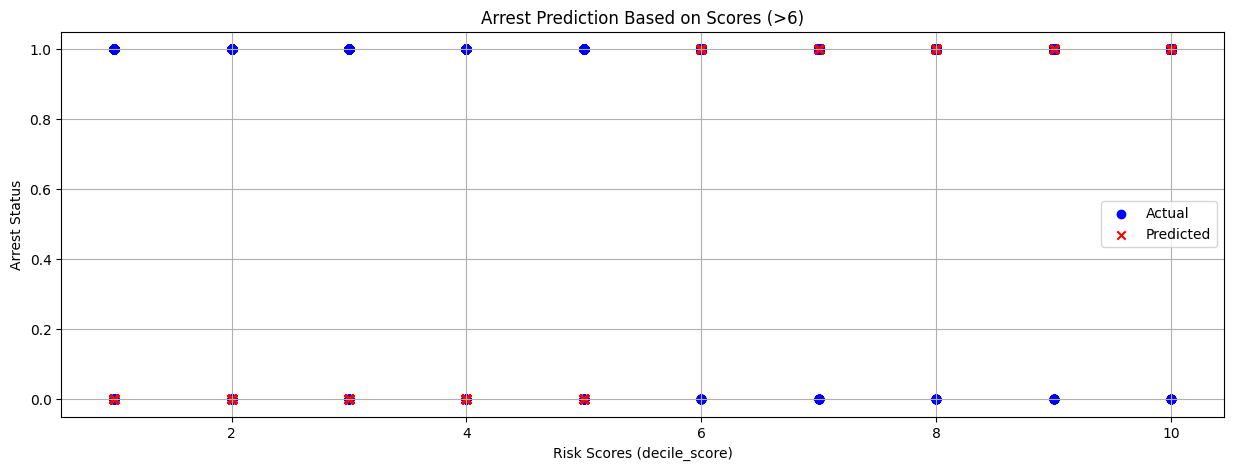

In [ ]:
# Visualize individuals based on their scores and actual arrest status
plt.scatter(defendantData['decile_score'], defendantData['arresting_status'].map({'Not arrested': 0, 'Arrested': 1}), color='blue', label='Actual')
plt.scatter(defendantData['decile_score'], defendantData['jail_pred_1'].map({'Not be jailed': 0, 'Will be jailed': 1}), color='red', marker='x', label='Predicted')

# Customize the plot
plt.title('Arrest Prediction Based on Scores (>6)')
plt.xlabel('Risk Scores (decile_score)')
plt.ylabel('Arrest Status')
plt.legend()
plt.grid(True)

# Show the plot
plt.show()

In [ ]:
# Compute accuracy
accuracy = accuracy_score(defendantData['arresting_status'].map({'Not arrested': 0, 'Arrested': 1}), defendantData['jail_pred_1'].map({'Not be jailed': 0, 'Will be jailed': 1}))
print(f'Accuracy: {accuracy:.2%}')

Accuracy: 37.55%


The accuracy is a bit better when we choose the risk score equal and greater than 6, but the accuracy is still low. However the number of people, who should be arreste based on the model and they are not jailed based on the actual situation, are increased.

**Given the scores and race of the defendants, show those who are low risk (released) and those who were jailed (I.e., those who were high risk and were re-arrested).**


In [ ]:
defendantData.race.value_counts()

African-American    3696
Caucasian           2454
Hispanic             637
Other                377
Asian                 32
Native American       18
Name: race, dtype: int64

In [ ]:
defendantData.decile_score.value_counts()

1     1440
2      941
4      769
3      747
5      681
6      641
7      592
8      512
9      508
10     383
Name: decile_score, dtype: int64

In [ ]:
defendantData.score_text.value_counts()

Low       3897
Medium    1914
High      1403
Name: score_text, dtype: int64

In [ ]:
# Filter the DataFrame for low and high risk
lowRsikDefendant = defendantData[defendantData['score_text'] == 'Low']

# Filter low risk defendants who are arrested
arrestedLowRisk = lowRsikDefendant[lowRsikDefendant['arresting_status'] == 'Arrested']

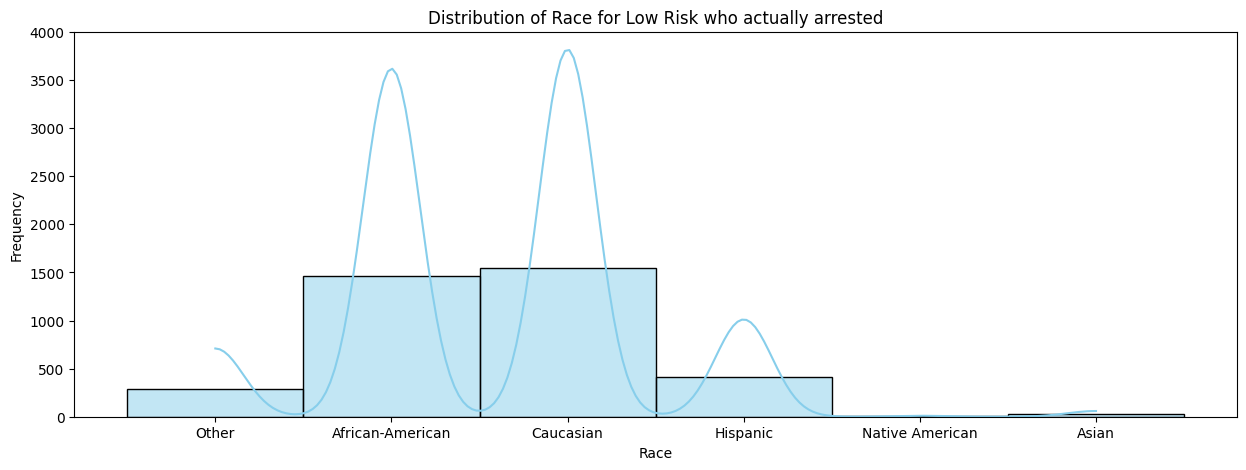

In [ ]:
sns.histplot(data=arrestedLowRisk, x='race', bins=10, kde=True, color='skyblue')

plt.title('Distribution of Race for Low Risk who actually arrested')
plt.xlabel('Race')
plt.ylabel('Frequency')

# Show the plot
plt.show()



<ipython-input-88-07c33adb72cf>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='race', data=arrestedLowRisk, palette='Set2')


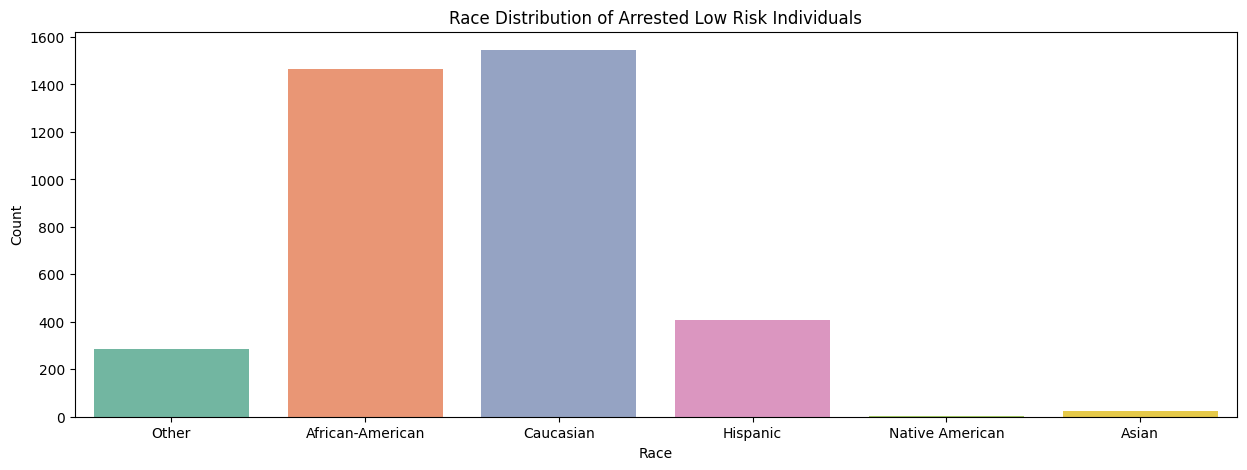

In [ ]:
sns.countplot(x='race', data=arrestedLowRisk, palette='Set2')

plt.title('Race Distribution of Arrested Low Risk Individuals')
plt.xlabel('Race')
plt.ylabel('Count')

# Show the plot
plt.show()


The above plots show that if we consider only low risk observation we find out African-American and Causian have the first and second ranks amont the race types for being arrested and Native-American and Asian have the lowest ranks respectively.

**Those who were high risk and were re-arrested**

In [ ]:
#Filter high score
highRsikDefendant = defendantData[defendantData['score_text'] == 'High']

#Filter high risk defendants who are re_arrested
reArrestedHighRisk = highRsikDefendant[highRsikDefendant['is_recid'] == 1]

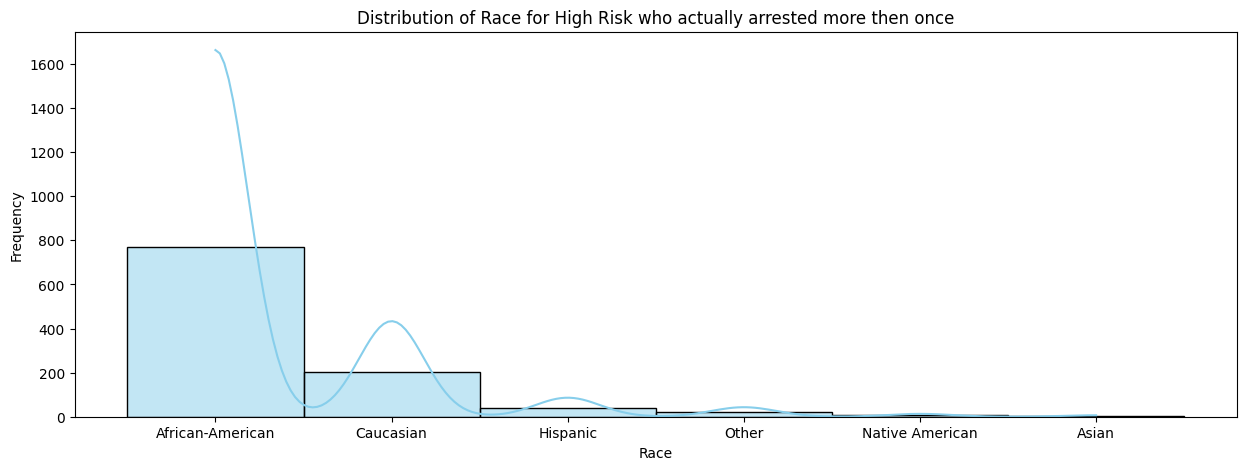

In [ ]:
sns.histplot(data=reArrestedHighRisk, x='race', bins=10, kde=True, color='skyblue')

plt.title('Distribution of Race for High Risk who actually arrested more than once')
plt.xlabel('Race')
plt.ylabel('Frequency')

# Show the plot
plt.show()

<ipython-input-93-047ade6a3caa>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='race', data=reArrestedHighRisk, palette='Set2')


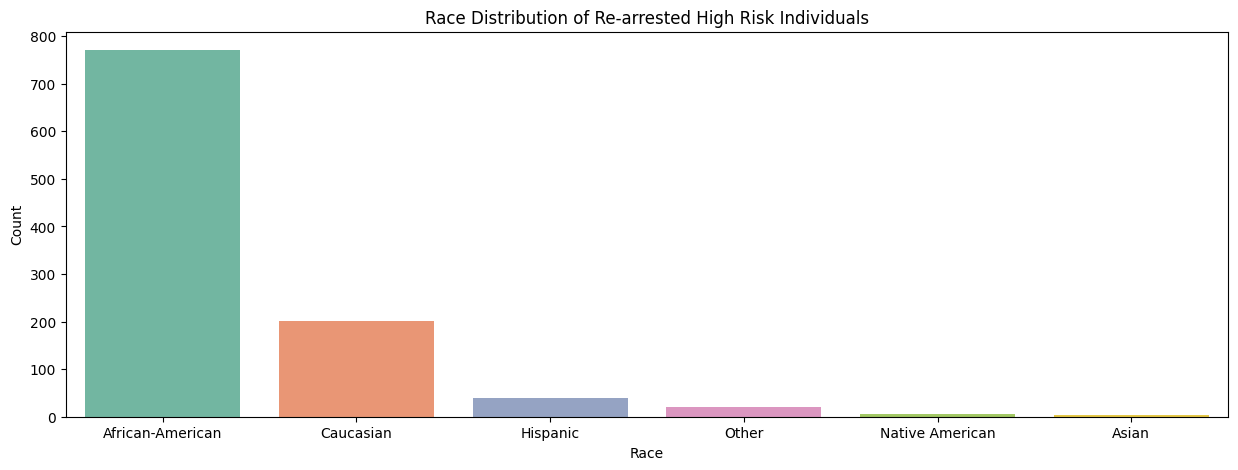

In [ ]:
sns.countplot(x='race', data=reArrestedHighRisk, palette='Set2')

# Customize the plot
plt.title('Race Distribution of Re-arrested High Risk Individuals')
plt.xlabel('Race')
plt.ylabel('Count')

# Show the plot
plt.show()

Arrested African-American and Caucasian with high risk score have the first and second ranks among race types.

In [ ]:
defendantData['is_recid'].value_counts()

0    3743
1    3471
Name: is_recid, dtype: int64

**Compare and interpret the visualisations (i.e., can you see patterns?)**

The graphs show that African-American and Cacussian have the highest number of jail sentence regardless of their score risk weather they are categorised as high risk or low risk. on the other hand Asian and Native American have the lowest number of jail sentence no matter they achive high or low risk scores. There is a pattern in the observations which suggest that regardless of risk score there is an order based on race which impact the jail sentences. Also it seems African-American is dicriminated and disadvantaged more than other race. We might come to conclusion that the race attribute has the highest weights in jail sentences. However, we need to consider other attributes as well.

**2.	Data Processing. Now that you’ve analysed the data that will be used to train the predictive model, process the data by detecting and mitigating bias using the AI Fairness 360 toolkit to ensure fairness and diversity.**

**Install aif360 with pip**

In [ ]:
!pip install aif360

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 214.1/214.1 kB 4.1 MB/s eta 0:00:00


In [ ]:
from aif360.datasets import StandardDataset
from aif360.metrics import BinaryLabelDatasetMetric, ClassificationMetric
from aif360.algorithms.preprocessing import Reweighing
from aif360.algorithms.inprocessing import AdversarialDebiasing
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier


pip install 'aif360[LawSchoolGPA]'
pip install 'aif360[Reductions]'
pip install 'aif360[Reductions]'
pip install 'aif360[Reductions]'


In [ ]:
import matplotlib
import matplotlib.pyplot as plt



In [ ]:
import tensorflow as tf

In [ ]:
defData = pd.read_csv("DefendantDataSet.csv")

In [ ]:
myCol = ['id', 'sex',
                 'age', 'age_cat', 'race', 'c_charge_degree', 'decile_score', 'priors_count', 'days_b_screening_arrest'
                 , 'score_text', 'is_recid', 'two_year_recid', 'c_jail_in', 'c_jail_out']

In [ ]:
defData = defData[myCol]

In [ ]:
defData['jail_pred'] = defData['decile_score'].map(lambda x: 'Not be jailed' if x < 6 else 'Will be jailed')

In [ ]:
defData.isnull().sum()

id                           0
sex                          0
age                          0
age_cat                      0
race                         0
c_charge_degree              0
decile_score                 0
priors_count                 0
days_b_screening_arrest    307
score_text                   0
is_recid                     0
two_year_recid               0
c_jail_in                  307
c_jail_out                 307
jail_pred                    0
dtype: int64

I replace Null values with Zero. to handle nan problem

In [ ]:
defData = defData.fillna(0)

In [ ]:
defData['jail_pred'].value_counts()

Not be jailed     4578
Will be jailed    2636
Name: jail_pred, dtype: int64

In [ ]:
default_mappings_defData = {
    'label_maps': [{0 : 'Not be jailed', 1: 'Will be jailed'}],
    'protected_attribute_maps': [
        {'African-American': 0, 'Caucasian': 1, 'Hispanic': 2, 'Other': 3, 'Asian': 4, 'Native American': 5},
        {'Male': 1, 'Female': 0},
        {'Young': 0, 'Old': 1}
    ]
}

In [ ]:
#
datasetDefData = StandardDataset(df = defData, label_name = 'jail_pred',\
                          favorable_classes=['Not be jailed'],\
                           categorical_features=['age_cat', \
                      'c_charge_degree', 'score_text'],\
                    # 'installment_plans', 'housing', 'skill_level', 'telephone',\
                    # 'foreign_worker'],\
                          protected_attribute_names=['age', 'sex', 'race'],\
                          privileged_classes=[lambda x: x >= 40, ['Male'], ['Caucasian']],\
                          features_to_drop=['c_jail_out', 'c_jail_in'],\
                          metadata=default_mappings_defData)

type(datasetDefData)

aif360.datasets.standard_dataset.StandardDataset

In [ ]:
datasetDefData

               instance weights features                                \
                                         protected attribute             
                                      id                 sex  age race   
instance names                                                           
0                           1.0      1.0                 1.0  1.0  0.0   
1                           1.0      3.0                 1.0  0.0  0.0   
2                           1.0      4.0                 1.0  0.0  0.0   
3                           1.0      5.0                 1.0  0.0  0.0   
4                           1.0      6.0                 1.0  1.0  0.0   
...                         ...      ...                 ...  ...  ...   
7209                        1.0  10996.0                 1.0  0.0  0.0   
7210                        1.0  10997.0                 1.0  0.0  0.0   
7211                        1.0  10999.0                 1.0  1.0  0.0   
7212                        1.0  11000

In [ ]:
dfDef, dict_df_def = datasetDefData.convert_to_dataframe()
print("Shape: ", dfDef.shape)
dfDef.head(5)


Shape:  (7214, 18)


,id,sex,age,race,decile_score,priors_count,days_b_screening_arrest,is_recid,two_year_recid,age_cat=25 - 45,age_cat=Greater than 45,age_cat=Less than 25,c_charge_degree=F,c_charge_degree=M,score_text=High,score_text=Low,score_text=Medium,jail_pred
0,1.0,1.0,1.0,0.0,1.0,0.0,-1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
1,3.0,1.0,0.0,0.0,3.0,0.0,-1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
2,4.0,1.0,0.0,0.0,4.0,4.0,-1.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0
3,5.0,1.0,0.0,0.0,8.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0
4,6.0,1.0,1.0,0.0,1.0,2.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0


In [ ]:
list(dfDef.columns)

['id',
 'sex',
 'age',
 'race',
 'decile_score',
 'priors_count',
 'days_b_screening_arrest',
 'is_recid',
 'two_year_recid',
 'age_cat=25 - 45',
 'age_cat=Greater than 45',
 'age_cat=Less than 25',
 'c_charge_degree=F',
 'c_charge_degree=M',
 'score_text=High',
 'score_text=Low',
 'score_text=Medium',
 'jail_pred']

In [ ]:
data_train_def, data_test_def = datasetDefData.split([0.7], shuffle=True)

privileged_groups = [{'age': 1}]
unprivileged_groups = [{'age': 0}]

In [ ]:
print("Original one hot encoded german dataset shape: ",datasetDefData.features.shape)
print("Train dataset shape: ", data_train_def.features.shape)
print("Test dataset shape: ", data_test_def.features.shape)

Original one hot encoded german dataset shape:  (7214, 17)
Train dataset shape:  (5049, 17)
Test dataset shape:  (2165, 17)


In [ ]:
# Install plotly if not already installed
!pip install plotly

# Import necessary libraries
import plotly.express as px

# Print the key
print("Key: ", datasetDefData.metadata['protected_attribute_maps'][2])

# Plot the age distribution
fig = px.bar(dfDef['age'].value_counts().reset_index(), x='index', y='age', labels={'index': 'Age', 'age': 'Frequency'})
fig.update_layout(xaxis_title="Age (0 = under 40, 1 = over 40)", yaxis_title="Frequency")
fig.show()

Key:  {'Young': 0, 'Old': 1}


In [ ]:
# Print the key
print("Key: ", datasetDefData.metadata['label_maps'])

# Plot the credit distribution
fig = px.bar(dfDef['jail_pred'].value_counts().reset_index(), x='index', y='jail_pred', labels={'index': 'jail_pred', 'credit': 'Frequency'})
fig.update_layout(xaxis_title="Credit ( 0 = Not be jailed, 1 = Will be jailed)", yaxis_title="Frequency")
fig.show()

Key:  [{0: 'Not be jailed', 1: 'Will be jailed'}]


In [ ]:
# Print the key
print("Key: ", datasetDefData.metadata['protected_attribute_maps'][0])

# Plot the age distribution
fig = px.bar(dfDef['race'].value_counts().reset_index(), x='index', y='race', labels={'index': 'Race', 'race': 'Frequency'})
fig.update_layout(xaxis_title="Race", yaxis_title="Frequency")
fig.show()

Key:  {'African-American': 0, 'Caucasian': 1, 'Hispanic': 2, 'Other': 3, 'Asian': 4, 'Native American': 5}


In [ ]:
# Convert the 'race' column to categorical based on the mapping
dfDef['race'] = dfDef['race'].map({v: k for k, v in race_mapping.items()})

# Check unique values in the 'race' column after conversion
unique_races_after_conversion = dfDef['race'].unique()
print("Unique Races in DataFrame after conversion: ", unique_races_after_conversion)

# Plot the age distribution
fig = px.bar(dfDef['race'].value_counts().reset_index(), x='index', y='race', labels={'index': 'Race', 'race': 'Frequency'})
fig.update_layout(xaxis_title="Race", yaxis_title="Frequency")
fig.show()



Unique Races in DataFrame after conversion:  ['African-American' 'Caucasian']


In [ ]:
defData['race'].value_counts()

African-American    3696
Caucasian           2454
Hispanic             637
Other                377
Asian                 32
Native American       18
Name: race, dtype: int64

The race plots do not show the correct number of African-American. but I can not fix this!Sorry!

In [ ]:
# Update the protected attribute mapping for 'sex'
sex_mapping_updated = {1: 'Male', 0: 'Female'}

# Replace the existing mapping with the updated one
datasetDefData.metadata['protected_attribute_maps'][1] = sex_mapping_updated

# Plot the sex distribution using the corrected mapping
fig = px.bar(dfDef['sex'].value_counts().reset_index(), x='index', y='sex', labels={'index': 'sex', 'sex': 'Frequency'})
fig.update_layout(xaxis_title="Gender (0 = Female, 1 = Male)", yaxis_title="Frequency")
fig.show()


In [ ]:
# Print the key
print("Key: ", datasetDefData.metadata['protected_attribute_maps'][1])

# Plot the age distribution
fig = px.bar(dfDef['sex'].value_counts().reset_index(), x='index', y='sex', labels={'index': 'sex', 'sex': 'Frequency'})
fig.update_layout(xaxis_title="Gender (0 = FeMale, 1 = Male)", yaxis_title="Frequency")
fig.show()

Key:  {'Male': 1, 'Female': 0}


**Compute Fairness Metrics on Original Training Data**

In [ ]:
# Define privileged and unprivileged groups based on all protected attributes
privileged_groups_all = [{'age': 1, 'sex': 1, 'race': 1}]
unprivileged_groups_all = [{'age': 0, 'sex': 0, 'race': 0}]

In [ ]:
privileged_groups = [{'age': 1}]
unprivileged_groups = [{'age': 0}]

In [ ]:
privileged_groups_sex = [{'sex': 1}]
unprivileged_groups_sex = [{'sex': 0}]

In [ ]:
privileged_groups_race = [{'race': 1}]
unprivileged_groups_race = [{'race': 0}]

In [ ]:
from aif360.metrics import BinaryLabelDatasetMetric

metric_train = BinaryLabelDatasetMetric(
     data_train_def,
     unprivileged_groups=unprivileged_groups,
     privileged_groups=privileged_groups
  )
print("Original training dataset")
print("Difference in mean outcomes between unprivileged and privileged groups = %f" % metric_train.mean_difference())

Original training dataset
Difference in mean outcomes between unprivileged and privileged groups = -0.233277


In [ ]:
from aif360.metrics import BinaryLabelDatasetMetric

metric_train_sex = BinaryLabelDatasetMetric(
     data_train_def,
     unprivileged_groups=unprivileged_groups_sex,
     privileged_groups=privileged_groups_sex
  )
print("Original training dataset")
print("Difference in mean outcomes between unprivileged and privileged groups, Sex Cat = %f" % metric_train_sex.mean_difference())

Original training dataset
Difference in mean outcomes between unprivileged and privileged groups, Sex Cat = 0.059597


In [ ]:
from aif360.metrics import BinaryLabelDatasetMetric

# Compute BinaryLabelDatasetMetric on the training dataset
metric_train_def = BinaryLabelDatasetMetric(
     data_train_def,
     unprivileged_groups=unprivileged_groups_all,
     privileged_groups=privileged_groups_all
)

print("Original training dataset")
print("Difference in mean outcomes between all unprivileged and all privileged groups = %f" % metric_train_def.mean_difference())


Original training dataset
Difference in mean outcomes between all unprivileged and all privileged groups = -0.269550


In [ ]:
from aif360.metrics import BinaryLabelDatasetMetric

metric_train_race = BinaryLabelDatasetMetric(
     data_train_def,
     unprivileged_groups=unprivileged_groups_race,
     privileged_groups=privileged_groups_race
  )
print("Original training dataset")
print("Difference in mean outcomes between unprivileged and privileged groups, Race = %f" % metric_train_race.mean_difference())

Original training dataset
Difference in mean outcomes between unprivileged and privileged groups, Race = -0.183996


**Disparate Impact**

In [ ]:
print("Original training dataset")
print("Disparate Impact = %f" % metric_train.disparate_impact())

Original training dataset
Disparate Impact = 0.707142


In [ ]:
print("Original training dataset")
print("Disparate Impact = %f" % metric_train_def.disparate_impact())

Original training dataset
Disparate Impact = 0.696965


In [ ]:
print("Original training dataset")
print("Disparate Impact = %f" % metric_train_sex.disparate_impact())

Original training dataset
Disparate Impact = 1.096068


In [ ]:
print("Original training dataset")
print("Disparate Impact (For Race) = %f" % metric_train_race.disparate_impact())

Original training dataset
Disparate Impact (For Race) = 0.755471


**Built-In Explainers**

In [ ]:
import json    #age cat
from aif360.explainers import MetricTextExplainer, MetricJSONExplainer

json_expl = MetricJSONExplainer(metric_train)
def format_json(json_str):
    return json.dumps(json.loads(json_str, object_pairs_hook=OrderedDict),
                      indent=2)

In [ ]:
from collections import OrderedDict

print(format_json(json_expl.mean_difference()))   #age cat

{
  "metric": "Mean Difference",
  "message": "Mean difference (mean label value on unprivileged instances - mean label value on privileged instances): -0.23327717311947516",
  "numPositivesUnprivileged": 1994.0,
  "numInstancesUnprivileged": 3540.0,
  "numPositivesPrivileged": 1202.0,
  "numInstancesPrivileged": 1509.0,
  "description": "Computed as the difference of the rate of favorable outcomes received by the unprivileged group to the privileged group.",
  "ideal": "The ideal value of this metric is 0.0"
}


In [ ]:
print(format_json(json_expl.disparate_impact()))   #age cat

{
  "metric": "Disparate Impact",
  "message": "Disparate impact (probability of favorable outcome for unprivileged instances / probability of favorable outcome for privileged instances): 0.7071420513832878",
  "numPositivePredictionsUnprivileged": 1994.0,
  "numUnprivileged": 3540.0,
  "numPositivePredictionsPrivileged": 1202.0,
  "numPrivileged": 1509.0,
  "description": "Computed as the ratio of rate of favorable outcome for the unprivileged group to that of the privileged group.",
  "ideal": "The ideal value of this metric is 1.0 A value < 1 implies higher benefit for the privileged group and a value >1 implies a higher benefit for the unprivileged group."
}


In [ ]:
import json
from aif360.explainers import MetricTextExplainer, MetricJSONExplainer

json_expl_def = MetricJSONExplainer(metric_train_def)
def format_json(json_str):
    return json.dumps(json.loads(json_str, object_pairs_hook=OrderedDict),
                      indent=2)

In [ ]:
from collections import OrderedDict

print(format_json(json_expl_def.mean_difference()))

{
  "metric": "Mean Difference",
  "message": "Mean difference (mean label value on unprivileged instances - mean label value on privileged instances): -0.2695502683691815",
  "numPositivesUnprivileged": 261.0,
  "numInstancesUnprivileged": 421.0,
  "numPositivesPrivileged": 483.0,
  "numInstancesPrivileged": 543.0,
  "description": "Computed as the difference of the rate of favorable outcomes received by the unprivileged group to the privileged group.",
  "ideal": "The ideal value of this metric is 0.0"
}


In [ ]:
print(format_json(json_expl_def.disparate_impact()))

{
  "metric": "Disparate Impact",
  "message": "Disparate impact (probability of favorable outcome for unprivileged instances / probability of favorable outcome for privileged instances): 0.6969652262433426",
  "numPositivePredictionsUnprivileged": 261.0,
  "numUnprivileged": 421.0,
  "numPositivePredictionsPrivileged": 483.0,
  "numPrivileged": 543.0,
  "description": "Computed as the ratio of rate of favorable outcome for the unprivileged group to that of the privileged group.",
  "ideal": "The ideal value of this metric is 1.0 A value < 1 implies higher benefit for the privileged group and a value >1 implies a higher benefit for the unprivileged group."
}


In [ ]:
import json
from aif360.explainers import MetricTextExplainer, MetricJSONExplainer

json_expl_sex = MetricJSONExplainer(metric_train_sex)
def format_json(json_str):
    return json.dumps(json.loads(json_str, object_pairs_hook=OrderedDict),
                      indent=2)

In [ ]:
from collections import OrderedDict

print(format_json(json_expl_sex.mean_difference()))

{
  "metric": "Mean Difference",
  "message": "Mean difference (mean label value on unprivileged instances - mean label value on privileged instances): 0.05959669915726651",
  "numPositivesUnprivileged": 648.0,
  "numInstancesUnprivileged": 953.0,
  "numPositivesPrivileged": 2541.0,
  "numInstancesPrivileged": 4096.0,
  "description": "Computed as the difference of the rate of favorable outcomes received by the unprivileged group to the privileged group.",
  "ideal": "The ideal value of this metric is 0.0"
}


In [ ]:
print(format_json(json_expl_sex.disparate_impact()))

{
  "metric": "Disparate Impact",
  "message": "Disparate impact (probability of favorable outcome for unprivileged instances / probability of favorable outcome for privileged instances): 1.0960677212704304",
  "numPositivePredictionsUnprivileged": 648.0,
  "numUnprivileged": 953.0,
  "numPositivePredictionsPrivileged": 2541.0,
  "numPrivileged": 4096.0,
  "description": "Computed as the ratio of rate of favorable outcome for the unprivileged group to that of the privileged group.",
  "ideal": "The ideal value of this metric is 1.0 A value < 1 implies higher benefit for the privileged group and a value >1 implies a higher benefit for the unprivileged group."
}


In [ ]:
import json
from aif360.explainers import MetricTextExplainer, MetricJSONExplainer

json_expl_race = MetricJSONExplainer(metric_train_race)
def format_json(json_str):
    return json.dumps(json.loads(json_str, object_pairs_hook=OrderedDict),
                      indent=2)

In [ ]:
from collections import OrderedDict

print(format_json(json_expl_race.mean_difference()))

{
  "metric": "Mean Difference",
  "message": "Mean difference (mean label value on unprivileged instances - mean label value on privileged instances): -0.18399642364182955",
  "numPositivesUnprivileged": 1885.0,
  "numInstancesUnprivileged": 3316.0,
  "numPositivesPrivileged": 1304.0,
  "numInstancesPrivileged": 1733.0,
  "description": "Computed as the difference of the rate of favorable outcomes received by the unprivileged group to the privileged group.",
  "ideal": "The ideal value of this metric is 0.0"
}


In [ ]:
print(format_json(json_expl_race.disparate_impact()))

{
  "metric": "Disparate Impact",
  "message": "Disparate impact (probability of favorable outcome for unprivileged instances / probability of favorable outcome for privileged instances): 0.7554710106048385",
  "numPositivePredictionsUnprivileged": 1885.0,
  "numUnprivileged": 3316.0,
  "numPositivePredictionsPrivileged": 1304.0,
  "numPrivileged": 1733.0,
  "description": "Computed as the ratio of rate of favorable outcome for the unprivileged group to that of the privileged group.",
  "ideal": "The ideal value of this metric is 1.0 A value < 1 implies higher benefit for the privileged group and a value >1 implies a higher benefit for the unprivileged group."
}


In [ ]:
import tensorflow as tf
tf.compat.v1.disable_eager_execution() #need to disable eager in TF2.x
#age cat
# reset tensorflow graph
tf.compat.v1.reset_default_graph()

# start tensorflow session
sess = tf.compat.v1.Session()



from aif360.algorithms.inprocessing import AdversarialDebiasing
# create AdversarialDebiasing model
debiased_model = AdversarialDebiasing(
    privileged_groups = privileged_groups,
    unprivileged_groups = unprivileged_groups,
    scope_name = 'debiased_classifier',
    debias = True,
    sess = sess)

# fit the model to training data
debiased_model.fit(data_train_def)

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


epoch 0; iter: 0; batch classifier loss: 145.752884; batch adversarial loss: 1.060599
epoch 1; iter: 0; batch classifier loss: 67.441940; batch adversarial loss: 0.843003
epoch 2; iter: 0; batch classifier loss: 49.712723; batch adversarial loss: 0.835775
epoch 3; iter: 0; batch classifier loss: 30.130327; batch adversarial loss: 0.818353
epoch 4; iter: 0; batch classifier loss: 23.781872; batch adversarial loss: 0.802926
epoch 5; iter: 0; batch classifier loss: 19.504398; batch adversarial loss: 0.824158
epoch 6; iter: 0; batch classifier loss: 13.154979; batch adversarial loss: 0.737982
epoch 7; iter: 0; batch classifier loss: 3.258946; batch adversarial loss: 0.708514
epoch 8; iter: 0; batch classifier loss: 2.128511; batch adversarial loss: 0.742507
epoch 9; iter: 0; batch classifier loss: 1.120729; batch adversarial loss: 0.793466
epoch 10; iter: 0; batch classifier loss: 0.871245; batch adversarial loss: 0.729583
epoch 11; iter: 0; batch classifier loss: 0.825464; batch adversari

In [ ]:
import tensorflow as tf
tf.compat.v1.disable_eager_execution()  # need to disable eager in TF2.x
#all cat
# reset tensorflow graph
tf.compat.v1.reset_default_graph()

# start tensorflow session
sess = tf.compat.v1.Session()

from aif360.algorithms.inprocessing import AdversarialDebiasing

# create AdversarialDebiasing model
debiased_model_all = AdversarialDebiasing(
    privileged_groups=privileged_groups_all,
    unprivileged_groups=unprivileged_groups_all,
    scope_name='debiased_classifier',
    debias=True,
    sess=sess
)

# fit the model to training data
debiased_model_all.fit(data_train_def)


epoch 0; iter: 0; batch classifier loss: 269.667480; batch adversarial loss: 0.850659
epoch 1; iter: 0; batch classifier loss: 73.317383; batch adversarial loss: 0.848281
epoch 2; iter: 0; batch classifier loss: 70.332100; batch adversarial loss: 0.693254
epoch 3; iter: 0; batch classifier loss: 42.357380; batch adversarial loss: 0.725677
epoch 4; iter: 0; batch classifier loss: 44.160385; batch adversarial loss: 0.695937
epoch 5; iter: 0; batch classifier loss: 27.411482; batch adversarial loss: 0.698505
epoch 6; iter: 0; batch classifier loss: 21.465240; batch adversarial loss: 0.636705
epoch 7; iter: 0; batch classifier loss: 13.231859; batch adversarial loss: 0.635802
epoch 8; iter: 0; batch classifier loss: 6.952530; batch adversarial loss: 0.638377
epoch 9; iter: 0; batch classifier loss: 3.283948; batch adversarial loss: 0.650381
epoch 10; iter: 0; batch classifier loss: 3.497010; batch adversarial loss: 0.633755
epoch 11; iter: 0; batch classifier loss: 2.182755; batch adversar

In [ ]:
#Sex Cat
import tensorflow as tf
tf.compat.v1.disable_eager_execution() #need to disable eager in TF2.x

# reset tensorflow graph
tf.compat.v1.reset_default_graph()

# start tensorflow session
sess = tf.compat.v1.Session()



from aif360.algorithms.inprocessing import AdversarialDebiasing
# create AdversarialDebiasing model
debiased_model_sex = AdversarialDebiasing(
    privileged_groups = privileged_groups_sex,
    unprivileged_groups = unprivileged_groups_sex,
    scope_name = 'debiased_classifier',
    debias = True,
    sess = sess)

# fit the model to training data
debiased_model_sex.fit(data_train_def)

epoch 0; iter: 0; batch classifier loss: 96.261078; batch adversarial loss: 0.828607
epoch 1; iter: 0; batch classifier loss: 65.463387; batch adversarial loss: 0.835476
epoch 2; iter: 0; batch classifier loss: 47.724792; batch adversarial loss: 0.794380
epoch 3; iter: 0; batch classifier loss: 37.060818; batch adversarial loss: 0.767935
epoch 4; iter: 0; batch classifier loss: 23.385490; batch adversarial loss: 0.695081
epoch 5; iter: 0; batch classifier loss: 14.900708; batch adversarial loss: 0.713468
epoch 6; iter: 0; batch classifier loss: 8.645468; batch adversarial loss: 0.673129
epoch 7; iter: 0; batch classifier loss: 9.315125; batch adversarial loss: 0.641669
epoch 8; iter: 0; batch classifier loss: 4.125051; batch adversarial loss: 0.609473
epoch 9; iter: 0; batch classifier loss: 2.067332; batch adversarial loss: 0.648422
epoch 10; iter: 0; batch classifier loss: 1.310636; batch adversarial loss: 0.584968
epoch 11; iter: 0; batch classifier loss: 1.538878; batch adversarial

In [ ]:
#Race Cat
import tensorflow as tf
tf.compat.v1.disable_eager_execution() #need to disable eager in TF2.x

# reset tensorflow graph
tf.compat.v1.reset_default_graph()

# start tensorflow session
sess = tf.compat.v1.Session()



from aif360.algorithms.inprocessing import AdversarialDebiasing
# create AdversarialDebiasing model
debiased_model_race = AdversarialDebiasing(
    privileged_groups = privileged_groups_race,
    unprivileged_groups = unprivileged_groups_race,
    scope_name = 'debiased_classifier',
    debias = True,
    sess = sess)

# fit the model to training data
debiased_model_race.fit(data_train_def)

epoch 0; iter: 0; batch classifier loss: 57.556290; batch adversarial loss: 0.759246
epoch 1; iter: 0; batch classifier loss: 75.537575; batch adversarial loss: 0.742561
epoch 2; iter: 0; batch classifier loss: 58.246387; batch adversarial loss: 0.701190
epoch 3; iter: 0; batch classifier loss: 30.845249; batch adversarial loss: 0.749838
epoch 4; iter: 0; batch classifier loss: 19.039726; batch adversarial loss: 0.678196
epoch 5; iter: 0; batch classifier loss: 16.183903; batch adversarial loss: 0.709997
epoch 6; iter: 0; batch classifier loss: 4.776202; batch adversarial loss: 0.695416
epoch 7; iter: 0; batch classifier loss: 4.504594; batch adversarial loss: 0.687137
epoch 8; iter: 0; batch classifier loss: 2.801320; batch adversarial loss: 0.705377
epoch 9; iter: 0; batch classifier loss: 2.097654; batch adversarial loss: 0.740615
epoch 10; iter: 0; batch classifier loss: 0.827643; batch adversarial loss: 0.674363
epoch 11; iter: 0; batch classifier loss: 0.869590; batch adversarial

In [ ]:
# make predictions on training and test data    age cat
data_debiasing_train = debiased_model.predict(data_train_def)
data_debiasing_test = debiased_model.predict(data_test_def)

type(data_debiasing_train)

aif360.datasets.standard_dataset.StandardDataset

In [ ]:
# make predictions on training and test data
data_debiasing_train_all = debiased_model_all.predict(data_train_def)
data_debiasing_test_all = debiased_model_all.predict(data_test_def)

type(data_debiasing_train_all)

aif360.datasets.standard_dataset.StandardDataset

In [ ]:
# make predictions on training and test data
data_debiasing_train_sex = debiased_model_sex.predict(data_train_def)
data_debiasing_test_sex = debiased_model_sex.predict(data_test_def)

type(data_debiasing_train_sex)

aif360.datasets.standard_dataset.StandardDataset

In [ ]:
# make predictions on training and test data
data_debiasing_train_race = debiased_model_race.predict(data_train_def)
data_debiasing_test_race = debiased_model_race.predict(data_test_def)

type(data_debiasing_train_race)

aif360.datasets.standard_dataset.StandardDataset

In [ ]:
# metrics for age cat
metric_data_debiasing_test_age = BinaryLabelDatasetMetric(
    data_debiasing_test,
    unprivileged_groups=unprivileged_groups,
    privileged_groups=privileged_groups
  )

from IPython.display import Markdown, display
display(Markdown("#### Transformed training dataset"))
print("Difference in mean outcomes between unprivileged and privileged groups = %f" % metric_data_debiasing_test_age.mean_difference())
# Close session
sess.close()

#### Transformed training dataset

Difference in mean outcomes between unprivileged and privileged groups = -0.004168


In [ ]:
# metrics for ALL Cats
metric_data_debiasing_test_all = BinaryLabelDatasetMetric(
    data_debiasing_test_all,
    unprivileged_groups=unprivileged_groups_all,
    privileged_groups=privileged_groups_all
  )

from IPython.display import Markdown, display
display(Markdown("#### Transformed training dataset"))
print("Difference in mean outcomes between unprivileged and privileged groups = %f" % metric_data_debiasing_test_all.mean_difference())
# Close session
sess.close()

#### Transformed training dataset

Difference in mean outcomes between unprivileged and privileged groups = 0.056356


In [ ]:
# metrics
metric_data_debiasing_test_sex = BinaryLabelDatasetMetric(
    data_debiasing_test_sex,
    unprivileged_groups=unprivileged_groups_sex,
    privileged_groups=privileged_groups_sex
  )

from IPython.display import Markdown, display
display(Markdown("#### Transformed training dataset"))
print("Difference in mean outcomes between unprivileged and privileged groups, Sex Cat = %f" % metric_data_debiasing_test_sex.mean_difference())
# Close session
sess.close()

#### Transformed training dataset

Difference in mean outcomes between unprivileged and privileged groups, Sex Cat = 0.068922


In [ ]:
# metrics
metric_data_debiasing_test_race = BinaryLabelDatasetMetric(
    data_debiasing_test_race,
    unprivileged_groups=unprivileged_groups_race,
    privileged_groups=privileged_groups_race
  )

from IPython.display import Markdown, display
display(Markdown("#### Transformed training dataset"))
print("Difference in mean outcomes between unprivileged and privileged groups, Race Cat = %f" % metric_data_debiasing_test_race.mean_difference())
# Close session
sess.close()

#### Transformed training dataset

Difference in mean outcomes between unprivileged and privileged groups, Race Cat = -0.087537


In [ ]:
from aif360.metrics import BinaryLabelDatasetMetric
#age
# Create a BinaryLabelDatasetMetric for the test data
metric_test = BinaryLabelDatasetMetric(data_test_def, unprivileged_groups=unprivileged_groups, privileged_groups=privileged_groups)

# Calculate fairness metrics
mean_difference = metric_test.mean_difference()
disparate_impact = metric_test.disparate_impact()

# Print the fairness metrics
print("Mean Difference: {:.4f}".format(mean_difference))
print("Disparate Impact: {:.4f}".format(disparate_impact))



Mean Difference: -0.2128
Disparate Impact: 0.7308


In [ ]:

# Create a BinaryLabelDatasetMetric for the test data
metric_test_all = BinaryLabelDatasetMetric(data_test_def, unprivileged_groups=unprivileged_groups_all, privileged_groups=privileged_groups_all)

# Calculate fairness metrics
mean_difference_all = metric_test_all.mean_difference()
disparate_impact_all = metric_test_all.disparate_impact()

# Print the fairness metrics
print("Mean Difference ALL: {:.4f}".format(mean_difference_all))
print("Disparate Impact All: {:.4f}".format(disparate_impact_all))

Mean Difference ALL: -0.1973
Disparate Impact All: 0.7725


In [ ]:

# Create a BinaryLabelDatasetMetric for the test data
metric_test_sex = BinaryLabelDatasetMetric(data_test_def, unprivileged_groups=unprivileged_groups_sex, privileged_groups=privileged_groups_sex)

# Calculate fairness metrics
mean_difference_sex = metric_test_sex.mean_difference()
disparate_impact_sex = metric_test_sex.disparate_impact()

# Print the fairness metrics
print("Mean Difference sex cat: {:.4f}".format(mean_difference_sex))
print("Disparate Impact sex cat: {:.4f}".format(disparate_impact_sex))

Mean Difference sex cat: 0.0694
Disparate Impact sex cat: 1.1107


In [ ]:
from aif360.metrics import BinaryLabelDatasetMetric

# Create a BinaryLabelDatasetMetric for the test data
metric_test_race = BinaryLabelDatasetMetric(data_test_def, unprivileged_groups=unprivileged_groups_race, privileged_groups=privileged_groups_race)

# Calculate fairness metrics
mean_difference_race = metric_test_race.mean_difference()
disparate_impact_race = metric_test_race.disparate_impact()

# Print the fairness metrics
print("Mean Difference Race Cat: {:.4f}".format(mean_difference_race))
print("Disparate Impact Race Cat: {:.4f}".format(disparate_impact_race))

Mean Difference Race Cat: -0.1548
Disparate Impact Race Cat: 0.7922
